In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from Ipython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.formate(css))

In [6]:
titles = pd.read_csv('titles.csv',index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [7]:
cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [37]:
release = pd.read_csv('release_dates.csv',index_col=None)
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [11]:
cast['character'] = cast['character'].fillna('')  # Replace NaN values with an empty string

# Check if 'Superman' and 'Batman' are in the characters list
cast['Superman'] = cast['character'].apply(lambda x: 'Superman' in str(x) if x is not None else False)
cast['Batman'] = cast['character'].apply(lambda x: 'Batman' in str(x) if x is not None else False)

# Count Superman and Batman appearances by year
superman_batman_counts = cast.groupby('year')[['Superman', 'Batman']].sum()

# Determine Superman years (where Superman appearances > Batman appearances)
superman_years = superman_batman_counts[superman_batman_counts['Superman'] > superman_batman_counts['Batman']]

# Count the total number of Superman years
num_superman_years = len(superman_years)

# Print the number of Superman years
print("Number of Superman years:", num_superman_years)

Number of Superman years: 15


In [15]:
batman_superman_characters = cast[(cast['character'] == 'Batman') | (cast['character'] == 'Superman')]

# Pivot the table to have Batman and Superman counts by year
character_counts_by_year = batman_superman_characters.pivot_table(index='year', columns='character', values='n', fill_value=0)

# Determine Batman years (where Batman appearances > Superman appearances)
batman_years = character_counts_by_year[character_counts_by_year['Batman'] > character_counts_by_year['Superman']]

# Count the total number of Batman years
num_batman_years = len(batman_years)

# Print the number of Batman years
print("Number of Batman years:", num_batman_years)

Number of Batman years: 21


<Figure size 1200x600 with 0 Axes>

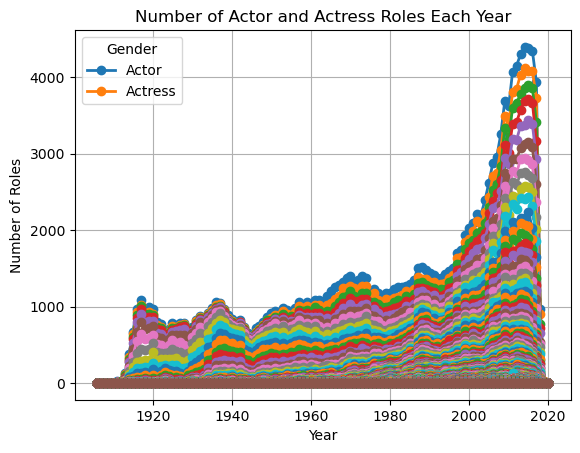

In [18]:
roles_by_year_gender = cast.groupby(['year', 'n']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
roles_by_year_gender.plot(kind='line', marker='o', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend(title='Gender', labels=['Actor', 'Actress'])
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

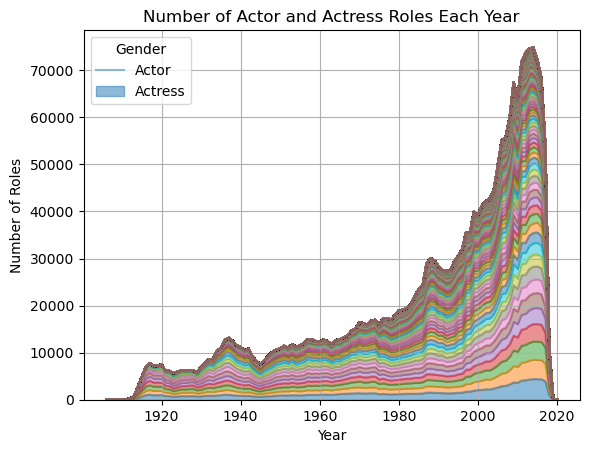

In [23]:
roles_by_year_gender = cast.groupby(['year', 'n']).size().unstack().fillna(0)

# Plotting as an area plot
plt.figure(figsize=(12, 6))
roles_by_year_gender.plot(kind='area', alpha=0.5)  # Use kind='area' and set alpha for transparency
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend(title='Gender', labels=['Actor', 'Actress'])
plt.grid(True)
plt.show()

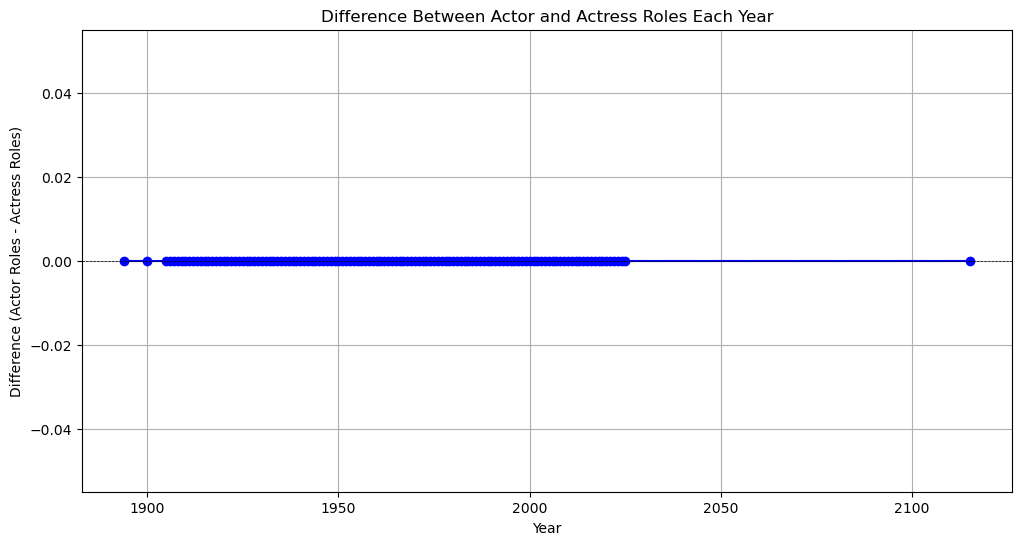

In [29]:
roles_by_year_gender = cast.groupby(['year', 'character']).size().unstack().fillna(0)

# Calculate the difference between actor and actress roles each year
roles_by_year_gender['Difference'] = roles_by_year_gender['name'] - roles_by_year_gender['name']
# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(roles_by_year_gender.index, roles_by_year_gender['Difference'], marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Difference (Actor Roles - Actress Roles)')
plt.title('Difference Between Actor and Actress Roles Each Year')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

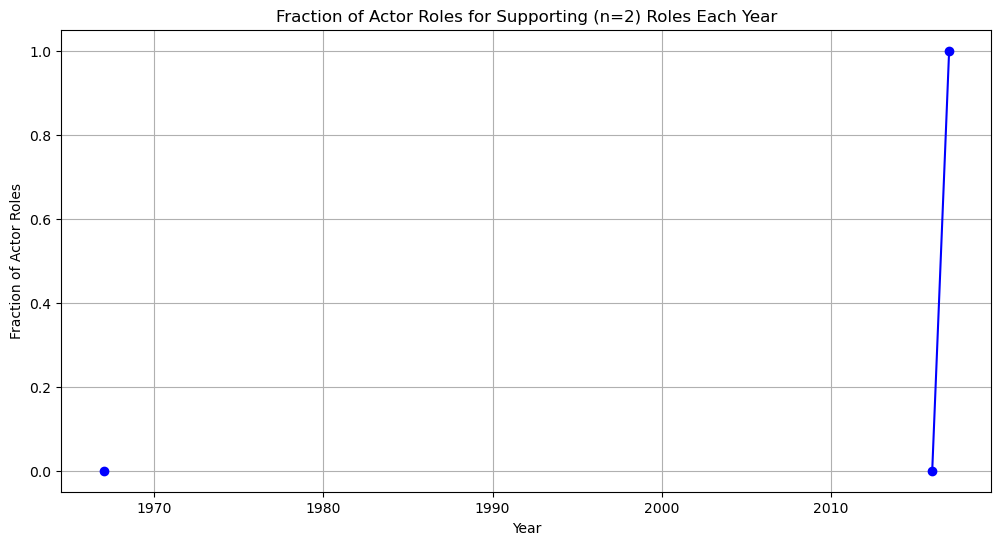

In [33]:
supporting_roles = cast[cast['n'] == 2]

# Group by year and gender, then count the occurrences
roles_by_year_gender = cast.groupby(['year', 'character']).size().unstack().fillna(0)

# Calculate the fraction of 'actor' roles each year
roles_by_year_gender['Fraction_Actor'] = roles_by_year_gender['name'] / (roles_by_year_gender['name'] + roles_by_year_gender['actress'])

# Plotting the fraction of 'actor' roles for supporting roles (n=2) each year
plt.figure(figsize=(12, 6))
plt.plot(roles_by_year_gender.index, roles_by_year_gender['Fraction_Actor'], marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles for Supporting (n=2) Roles Each Year')
plt.grid(True)
plt.show()

In [36]:
filtered_roles = cast[cast['n'].between(1, 3)]

# Group by year, rank (n), and gender, then count the occurrences
roles_by_year_rank_gender = filtered_roles.groupby(['year', 'n', 'character']).size().unstack().fillna(0)

# Calculate the fraction of 'actor' roles for each rank and each year
for n in range(1, 4):
    roles_by_year_rank_gender[f'Fraction_Actor_n={n}'] = roles_by_year_rank_gender['n'] / \
                                                           (roles_by_year_rank_gender['n'] +
                                                            roles_by_year_rank_gender['n'])

# Plotting the fraction of 'actor' roles for each rank (n=1, n=2, n=3) each year
plt.figure(figsize=(12, 6))
for n in range(1, 4):
    plt.plot(roles_by_year_rank_gender.index.get_level_values('year'),
             roles_by_year_rank_gender[f'Fraction_Actor_n={n}'],
             marker='o', label=f'n={n}')

plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles for Different Ranks (n=1, n=2, n=3) Each Year')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'n'

In [38]:
print(release)

                          title  year      country        date
0         #73, Shaanthi Nivaasa  2007        India  2007-06-15
1                         #BKKY  2016     Cambodia  2017-10-12
2                       #Beings  2015      Romania  2015-01-29
3                     #Captured  2017          USA  2017-09-05
4        #Ewankosau saranghaeyo  2015  Philippines  2015-01-21
...                         ...   ...          ...         ...
479483  xXx: State of the Union  2005      Uruguay  2005-04-29
479484  xXx: State of the Union  2005       Poland  2005-06-03
479485  xXx: State of the Union  2005       Turkey  2005-06-03
479486  xXx: State of the Union  2005        China  2005-06-17
479487  xXx: State of the Union  2005       Greece  2005-06-24

[479488 rows x 4 columns]


C:\Users\fahee\AppData\Local\Temp\ipykernel_25496\1112283062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christmas_movies_usa['month'] = christmas_movies_usa['date']


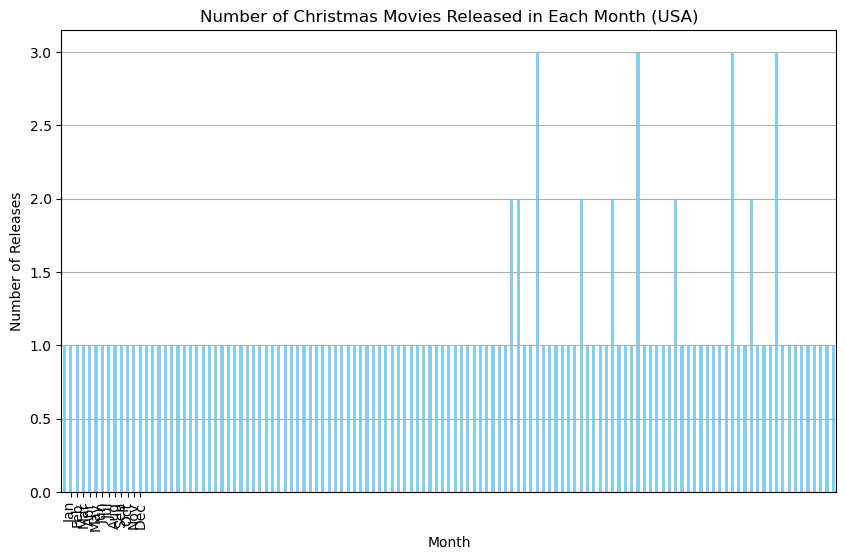

In [41]:
christmas_movies_usa = release[(release['title'].str.contains('Christmas', case=False)) &
                                 (release['country'] == 'USA')]

# Extract the month from the release date
christmas_movies_usa['month'] = christmas_movies_usa['date']

# Count the number of releases for each month
monthly_counts = christmas_movies_usa['month'].value_counts().sort_index()

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of Christmas Movies Released in Each Month (USA)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

C:\Users\fahee\AppData\Local\Temp\ipykernel_25496\1554376108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbit_movies_usa['month'] = hobbit_movies_usa['date']


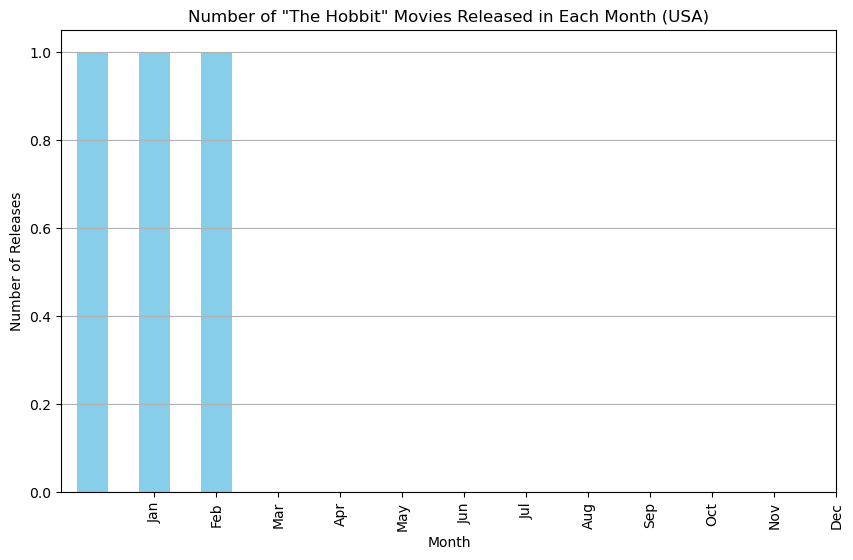

In [43]:
hobbit_movies_usa = release[(release['title'].str.startswith('The Hobbit')) &
                               (release['country'] == 'USA')]

# Extract the month from the release date
hobbit_movies_usa['month'] = hobbit_movies_usa['date']

# Count the number of releases for each month
monthly_counts = hobbit_movies_usa['month'].value_counts().sort_index()

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of "The Hobbit" Movies Released in Each Month (USA)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

C:\Users\fahee\AppData\Local\Temp\ipykernel_25496\2127145558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romance_movies_usa['day_of_week'] = romance_movies_usa['date']


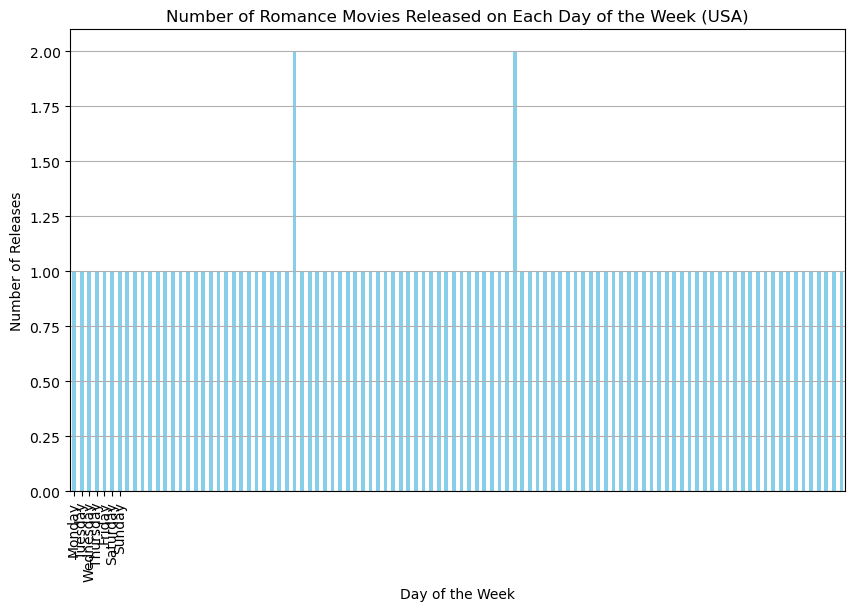

In [45]:
romance_movies_usa = release[(release['title'].str.contains('Romance', case=False)) &
                                (release['country'] == 'USA')]

# Extract the day of the week from the release date (0=Monday, 6=Sunday)
romance_movies_usa['day_of_week'] = romance_movies_usa['date']

# Count the number of releases for each day of the week
daily_counts = romance_movies_usa['day_of_week'].value_counts().sort_index()

# Map day numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.title('Number of Romance Movies Released on Each Day of the Week (USA)')
plt.xticks(range(7), labels=day_names)
plt.grid(axis='y')
plt.show()

C:\Users\fahee\AppData\Local\Temp\ipykernel_25496\3256528568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_movies_usa['day_of_week'] = action_movies_usa['date']


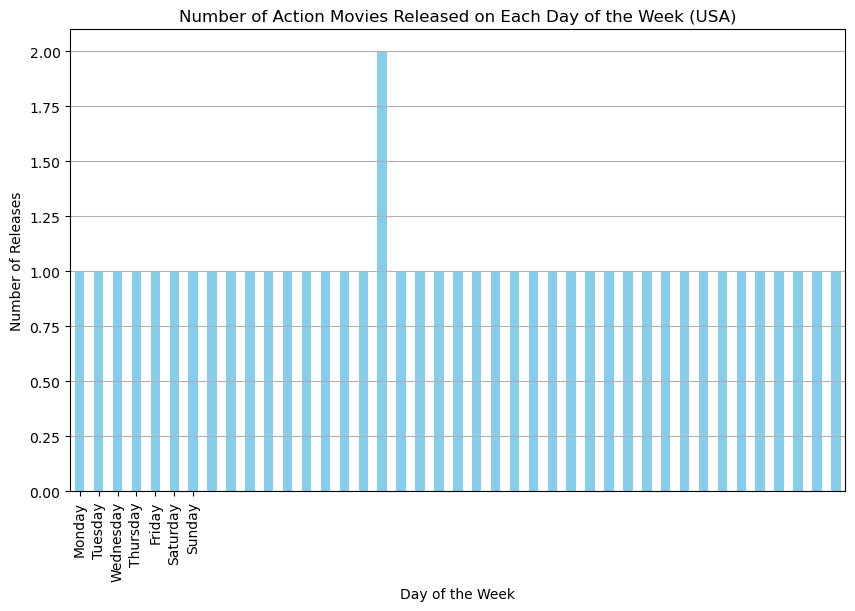

In [46]:
action_movies_usa = release[(release['title'].str.contains('Action', case=False)) &
                                (release['country'] == 'USA')]

# Extract the day of the week from the release date (0=Monday, 6=Sunday)
action_movies_usa['day_of_week'] = action_movies_usa['date']

# Count the number of releases for each day of the week
daily_counts = action_movies_usa['day_of_week'].value_counts().sort_index()

# Map day numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.title('Number of Action Movies Released on Each Day of the Week (USA)')
plt.xticks(range(7), labels=day_names)
plt.grid(axis='y')
plt.show()

In [50]:
r['date'] = pd.to_datetime(movies_df['date'], errors='coerce')

# Filter for Judi Dench movies in the 1990s released in the USA
judi_dench_movies_1990s_usa = movies_df[
    (release['title'].str.contains('Judi Dench', case=False, na=False)) &
    (release['date'].dt.year.between(1990, 1999, inclusive=True)) &
    (release['country'] == 'USA')
]

# Display the release date for each movie
for index, row in judi_dench_movies_1990s_usa.iterrows():
    print(f"Movie: {row['title']} - Release Date: {row['date'].strftime('%Y-%m-%d')}")
In this modified code, we first convert the 'date' column to datetime format using pd.to_datetime(). We also handle any potential errors during the conversion using the errors='coerce' argument. Then, we filter the DataFrame using the .dt accessor on the 'date' column. Adjust the code according to your actual dataset structure and the format of the columns.

AttributeError: Can only use .dt accessor with datetimelike values